In [18]:
"""
Anit Mathew
CMPS 530 01
This program implements Multiplr Linear Regression model 
"""

# Basic Libraries
import pandas as pd
import seaborn as sb
import numpy as np

import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Libraries used for Modelling
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm




In [19]:
# reading the dataset
df =  pd.read_csv('dataset.csv')
df = df[['room_type','bedrooms','price','reviews','overall_satisfaction', 'accommodates', 'latitude', 'longitude']]
# performing label encoding so that labels could be converted into numeric form to make machine readable
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,room_type,bedrooms,price,reviews,overall_satisfaction,accommodates,latitude,longitude
0,2,1,50,2,0,1,6249,1238
1,2,1,67,0,0,0,333,7851
2,2,1,62,0,0,1,7728,8104
3,2,1,57,1,0,2,6663,2558
4,2,1,65,1,0,1,1892,4875


In [20]:
# To convert NaN values to 0 for preparation for Modelling
newdf = df.fillna(0)
# Checking to ensure that there are no NULL entries
newdf.isnull().sum()

room_type               0
bedrooms                0
price                   0
reviews                 0
overall_satisfaction    0
accommodates            0
latitude                0
longitude               0
dtype: int64

In [21]:
# Separating X and y for Modelling
X = pd.DataFrame(df[["bedrooms", "room_type",'reviews', 'overall_satisfaction','accommodates']]) #Predictor Variable
y = pd.DataFrame(df["price"]) #Response Variable

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [22]:
# dividing the datset into training and test set. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
# Creating and fitting the model
linreg = linear_model.LinearRegression()     
linreg.fit(X_train, y_train)

LinearRegression()

In [24]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [158.49131396]

             Predictors  Coefficients
0              bedrooms     46.969974
1             room_type    -31.342611
2               reviews     -8.215275
3  overall_satisfaction    -20.322066
4          accommodates     35.449917



In [25]:
# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

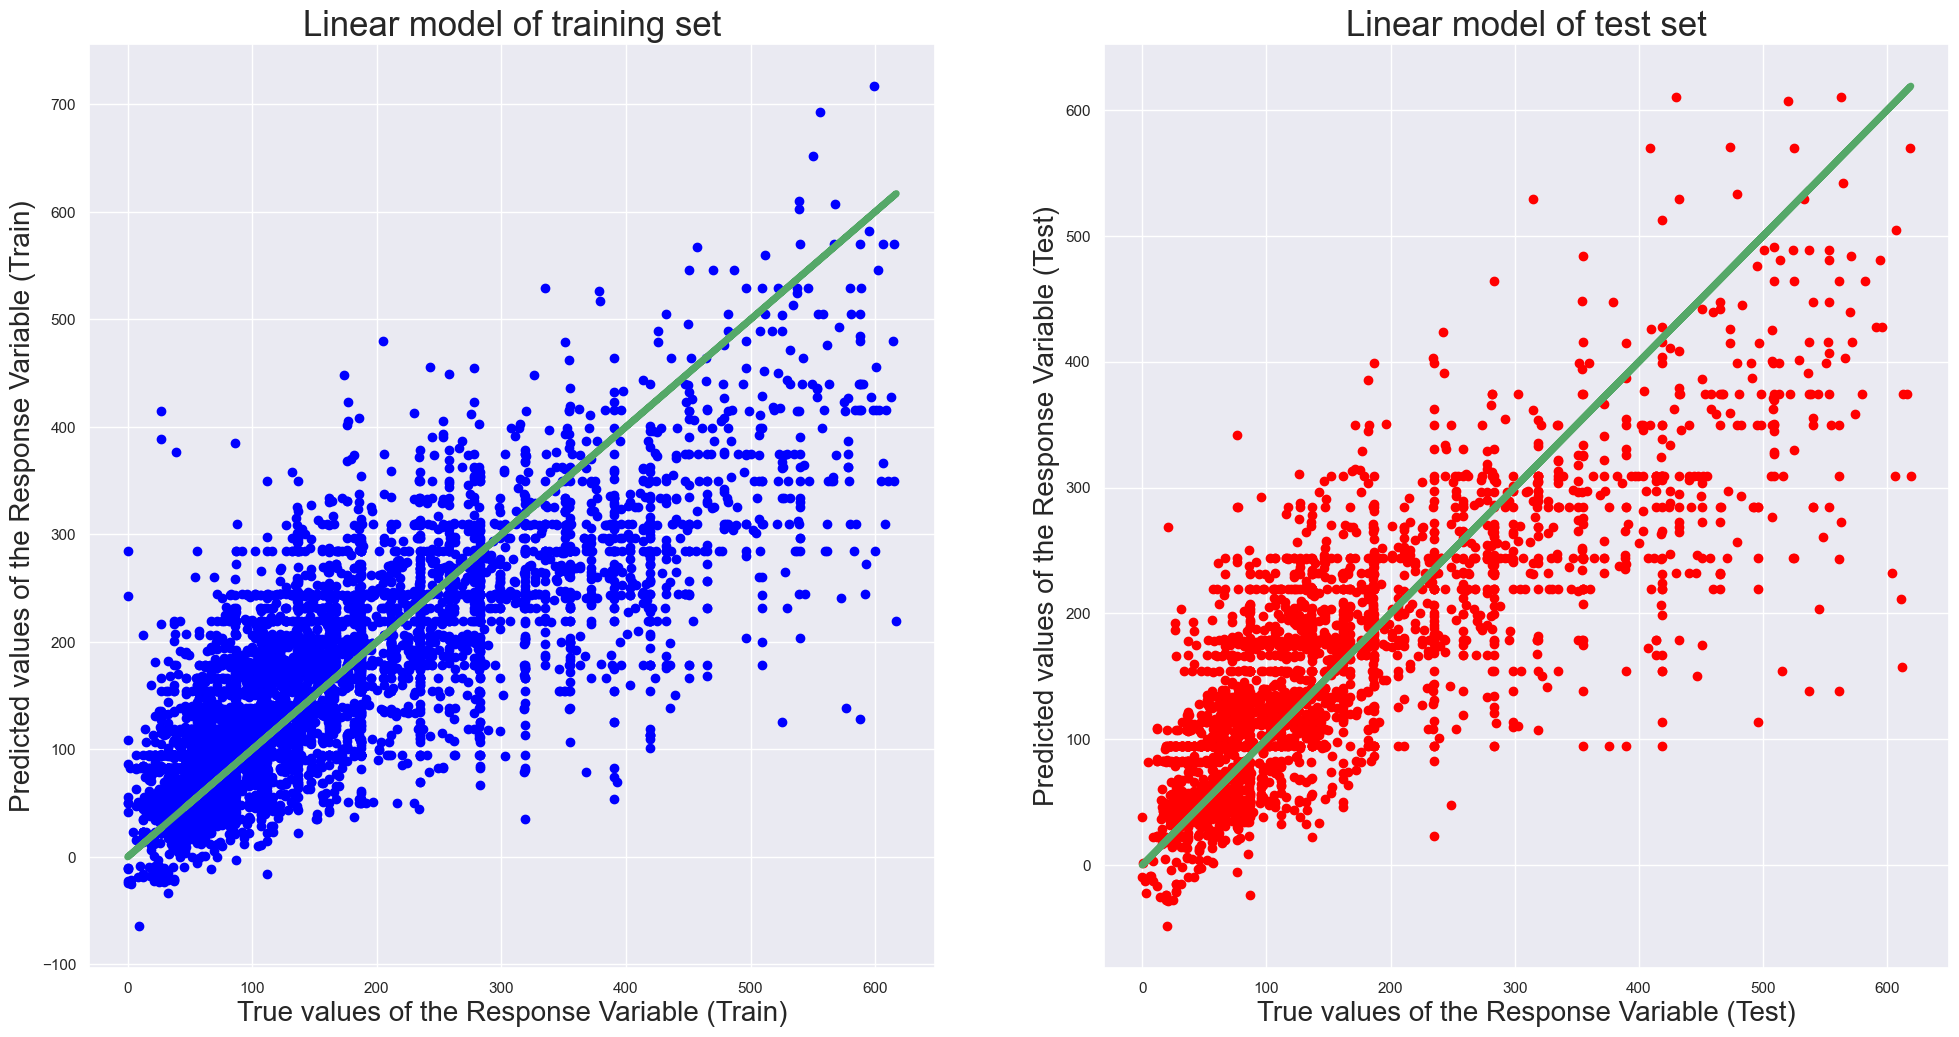

In [26]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)", fontsize=20)
axes[0].set_ylabel("Predicted values of the Response Variable (Train)", fontsize=20)
axes[0].set_title("Linear model of training set", fontsize=25)
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)", fontsize=20)
axes[1].set_ylabel("Predicted values of the Response Variable (Test)", fontsize=20)
axes[1].set_title("Linear model of test set", fontsize=25)
plt.savefig("Linearmodel.png")


In [34]:
#add constant to predictor variables
x = sm.add_constant(X)
#fit linear regression model
model = sm.OLS(y, x).fit()
#view model summary
print(model.summary())

#display adjusted R-squared
print("The adjusted R-squared is : ",1 - (1-linreg.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     3266.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:14:21   Log-Likelihood:                -52465.
No. Observations:                9111   AIC:                         1.049e+05
Df Residuals:                    9105   BIC:                         1.050e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  159.1328 